In [36]:
import uproot
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep

In [37]:
CONFIG_FILE = '/mnt/nvme0n1p4/CLion-Pycharm-projects/PycharmProjects/Onnx-Inference/CaloML/config_hgm_mc16.yaml'
ONNX_MODEL_PATH = '/mnt/nvme0n1p4/CLion-Pycharm-projects/PycharmProjects/Onnx-Inference/CaloML/HGM_3.model-03-12-2025.onnx'
INPUT_NTUPLE = '/mnt/nvme0n1p4/CLion-Pycharm-projects/PycharmProjects/Onnx-Inference/CaloML/ClusterEnergies.root'

In [38]:
df = uproot.concatenate(INPUT_NTUPLE, library='pd')

In [39]:
df["avgMu"]=np.array([2]*len(df))

In [45]:
df.head()

,clusterE,clusterE_LCW,clusterE_Truth,clusterEta,cluster_SIGNIFICANCE,cluster_time,cluster_SECOND_TIME,cluster_CENTER_LAMBDA,cluster_CENTER_MAG,cluster_ENG_FRAC_EM,cluster_FIRST_ENG_DENS,cluster_LONGITUDINAL,cluster_LATERAL,cluster_PTD,cluster_ISOLATION,nPrimVtx,avgMu
0,16.499309,22.967885,16166.611328,1.874702,82.801994,0.102387,0.046077,256.037323,4177.289551,1.000000,0.020791,0.244089,0.399780,0.635285,0.880452,3,2
1,9.138374,13.189838,7197.510254,1.788090,20.072351,0.133287,0.781234,102.551758,4066.940918,0.846218,0.007591,0.798493,0.785001,0.244286,0.951204,3,2
2,2.748852,4.042329,2678.146729,0.399391,9.035995,1.206650,0.331080,1005.168762,2623.692383,0.058387,0.000053,0.739138,0.543075,0.555546,0.835458,3,2
3,3.375970,6.719827,2839.731201,1.105703,11.350155,0.203049,19.057089,312.104462,2783.903320,0.920799,0.000500,0.834718,0.816080,0.334258,0.746926,3,2
4,2.404664,4.596327,2574.151123,1.009612,8.215182,3.097960,30.369579,284.807587,2590.650879,1.000000,0.000565,0.812865,0.715392,0.345916,1.000000,3,2


In [46]:
from process_features import FeatureProcessor

In [47]:
processor = FeatureProcessor(config_path=CONFIG_FILE)
processor.feature_definitions

FeatureProcessor initialized successfully.


{'clusterE': {'name_pt': 'e_ems',
  'unit': 'GeV',
  'preprocessing': ['LogTenStandard'],
  'parameter': [0, 0, 0.5383309653195014, 0.628568916276738],
  'index': 0},
 'clusterEta': {'name_pt': 'y_ems',
  'unit': 'None',
  'preprocessing': ['Standard'],
  'parameter': [-0.016698479788232697, 1.0491226036634902],
  'index': 1},
 'cluster_SIGNIFICANCE': {'name_pt': 'm_sig',
  'unit': 'None',
  'preprocessing': ['LogTenStandard'],
  'parameter': [0, 0, 0.8161004842702827, 0.47155666226363097],
  'index': 2},
 'cluster_time': {'name_pt': 't_ems',
  'unit': 'ns',
  'preprocessing': ['MaxAbsolute'],
  'parameter': [475.3998107910156],
  'index': 3},
 'cluster_SECOND_TIME': {'name_pt': 'm_tim',
  'unit': 'ns*ns',
  'preprocessing': ['LogTenStandard'],
  'parameter': [0.0, 1e-10, -0.8516841907428125, 3.5748536072144943],
  'index': 4},
 'cluster_CENTER_LAMBDA': {'name_pt': 'm_lam',
  'unit': 'mm',
  'preprocessing': ['LogTenStandard'],
  'parameter': [0, 0, 2.4409632778948436, 0.45775598457833

In [43]:
df_scaled = processor.transform(df)


Applying transformations to 13565 rows...
  - Processing column 'clusterE'...
    - Applied 'LogTenStandard' successfully.
  - Processing column 'clusterEta'...
    - Applied 'Standard' successfully.
  - Processing column 'cluster_SIGNIFICANCE'...
    - Applied 'LogTenStandard' successfully.
  - Processing column 'cluster_time'...
    - Applied 'MaxAbsolute' successfully.
  - Processing column 'cluster_SECOND_TIME'...
    - Applied 'LogTenStandard' successfully.
  - Processing column 'cluster_CENTER_LAMBDA'...
    - Applied 'LogTenStandard' successfully.
  - Processing column 'cluster_CENTER_MAG'...
    - Applied 'Standard' successfully.
  - Processing column 'cluster_ENG_FRAC_EM'...
    - Applied 'Standard' successfully.
  - Processing column 'cluster_FIRST_ENG_DENS'...
    - Applied 'LogTenStandard' successfully.
  - Processing column 'cluster_LONGITUDINAL'...
    - Applied 'Standard' successfully.
  - Processing column 'cluster_LATERAL'...
    - Applied 'Standard' successfully.
  -

/mnt/nvme0n1p4/CLion-Pycharm-projects/PycharmProjects/Onnx-Inference/venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
model_outputs = processor.run_inference(model_path=ONNX_MODEL_PATH, df=df_scaled)


--- Running ONNX Inference ---
Model: /mnt/nvme0n1p4/CLion-Pycharm-projects/PycharmProjects/Onnx-Inference/CaloML/HGM_3.model-03-12-2025.onnx
Input features ordered by index: ['clusterE', 'clusterEta', 'cluster_SIGNIFICANCE', 'cluster_time', 'cluster_SECOND_TIME', 'cluster_CENTER_LAMBDA', 'cluster_CENTER_MAG', 'cluster_ENG_FRAC_EM', 'cluster_FIRST_ENG_DENS', 'cluster_LONGITUDINAL', 'cluster_LATERAL', 'cluster_PTD', 'cluster_ISOLATION', 'nPrimVtx', 'avgMu']
Input tensor shape: (13565, 15)
ONNX model output keys: ['mus', 'sigmas', 'alphas']
Inference complete.


In [18]:
model_outputs

[array([[ 0.4550743 ,  0.22159815,  0.6631278 ],
        [ 0.78298414,  0.46786937,  0.9453498 ],
        [ 1.0631461 ,  0.7503868 ,  1.1286349 ],
        ...,
        [ 0.16230136, -0.09291684,  0.136857  ],
        [ 0.22512625, -0.01654585, -0.01235183],
        [ 0.1105471 , -0.0171019 ,  0.04290788]], dtype=float32),
 array([[-5.9111805, -7.8977365, -4.560067 ],
        [-5.4543195, -5.735457 , -4.755737 ],
        [-5.0451283, -3.448449 , -4.9757404],
        ...,
        [-7.175394 , -5.2941756, -4.5750318],
        [-6.6493344, -6.4145885, -4.7407537],
        [-7.8611383, -7.2612724, -4.9784946]], dtype=float32),
 array([[0.0154175 , 0.9599806 , 0.02460187],
        [0.26305303, 0.45445865, 0.2824883 ],
        [0.06361744, 0.02708668, 0.90929586],
        ...,
        [0.6374686 , 0.11358876, 0.24894264],
        [0.17178822, 0.39950043, 0.42871135],
        [0.5324844 , 0.18153867, 0.28597692]], dtype=float32)]

In [19]:
mus = model_outputs[0]
sigmas = model_outputs[1]
alphas = model_outputs[2]
print(mus)

[[ 0.4550743   0.22159815  0.6631278 ]
 [ 0.78298414  0.46786937  0.9453498 ]
 [ 1.0631461   0.7503868   1.1286349 ]
 ...
 [ 0.16230136 -0.09291684  0.136857  ]
 [ 0.22512625 -0.01654585 -0.01235183]
 [ 0.1105471  -0.0171019   0.04290788]]


In [20]:
print(df_scaled.isna().sum())
print(np.isinf(df_scaled).sum())

clusterE                  117
clusterE_LCW                0
clusterE_Truth              0
clusterEta                  0
cluster_SIGNIFICANCE       52
cluster_time                0
cluster_SECOND_TIME         0
cluster_CENTER_LAMBDA       0
cluster_CENTER_MAG          0
cluster_ENG_FRAC_EM         0
cluster_FIRST_ENG_DENS      0
cluster_LONGITUDINAL        0
cluster_LATERAL             0
cluster_PTD                 0
cluster_ISOLATION           0
nPrimVtx                    0
avgMu                       0
dtype: int64
clusterE                   0
clusterE_LCW               0
clusterE_Truth             0
clusterEta                 0
cluster_SIGNIFICANCE       0
cluster_time               0
cluster_SECOND_TIME        0
cluster_CENTER_LAMBDA      9
cluster_CENTER_MAG         0
cluster_ENG_FRAC_EM        0
cluster_FIRST_ENG_DENS    41
cluster_LONGITUDINAL       0
cluster_LATERAL            0
cluster_PTD                0
cluster_ISOLATION          0
nPrimVtx                   0
avgMu        

In [21]:
print(np.isnan(model_outputs[0]).sum())
print(np.isnan(model_outputs[1]).sum())
print(np.isnan(model_outputs[2]).sum())

513
513
513


In [22]:
print(np.isnan(model_outputs[0]).sum(), np.isinf(model_outputs[0]).sum())

513 0


In [23]:
# prediction from torch
# mean
import torch
# Convert to torch tensors if needed
alphas_torch = torch.from_numpy(alphas)
mus_torch = torch.from_numpy(mus)
torch.sum(alphas_torch * mus_torch)

tensor(nan)

In [24]:
output_weights = model_outputs[2]

output_means = 10**model_outputs[0]
max_mode_indices = np.argmax(output_weights, axis=1)
predicted_values = output_means[np.arange(output_means.shape[0]), max_mode_indices]
df['clusterE_ML'] = predicted_values

In [25]:
output_means.shape

(13565, 3)

In [26]:
df.head()

,clusterE,clusterE_LCW,clusterE_Truth,clusterEta,cluster_SIGNIFICANCE,cluster_time,cluster_SECOND_TIME,cluster_CENTER_LAMBDA,cluster_CENTER_MAG,cluster_ENG_FRAC_EM,cluster_FIRST_ENG_DENS,cluster_LONGITUDINAL,cluster_LATERAL,cluster_PTD,cluster_ISOLATION,nPrimVtx,avgMu,clusterE_ML
0,16.499309,22.967885,16166.611328,1.874702,82.801994,0.102387,0.046077,256.037323,4177.289551,1.000000,0.020791,0.244089,0.399780,0.635285,0.880452,3,1,1.665705
1,9.138374,13.189838,7197.510254,1.788090,20.072351,0.133287,0.781234,102.551758,4066.940918,0.846218,0.007591,0.798493,0.785001,0.244286,0.951204,3,1,2.936766
2,2.748852,4.042329,2678.146729,0.399391,9.035995,1.206650,0.331080,1005.168762,2623.692383,0.058387,0.000053,0.739138,0.543075,0.555546,0.835458,3,1,13.447295
3,3.375970,6.719827,2839.731201,1.105703,11.350155,0.203049,19.057089,312.104462,2783.903320,0.920799,0.000500,0.834718,0.816080,0.334258,0.746926,3,1,1.543144
4,2.404664,4.596327,2574.151123,1.009612,8.215182,3.097960,30.369579,284.807587,2590.650879,1.000000,0.000565,0.812865,0.715392,0.345916,1.000000,3,1,1.294290


In [27]:
mplhep.style.use('ATLAS')

(exptext: Custom Text(0.05, 0.95, 'ATLAS'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation Preliminary'),
 supptext: Custom Text(0.05, 0.95, ''),
 expsuffix: Custom Text(0.05, 0.95, '$\\sqrt{s} = \\mathrm{13\\ TeV}$'))

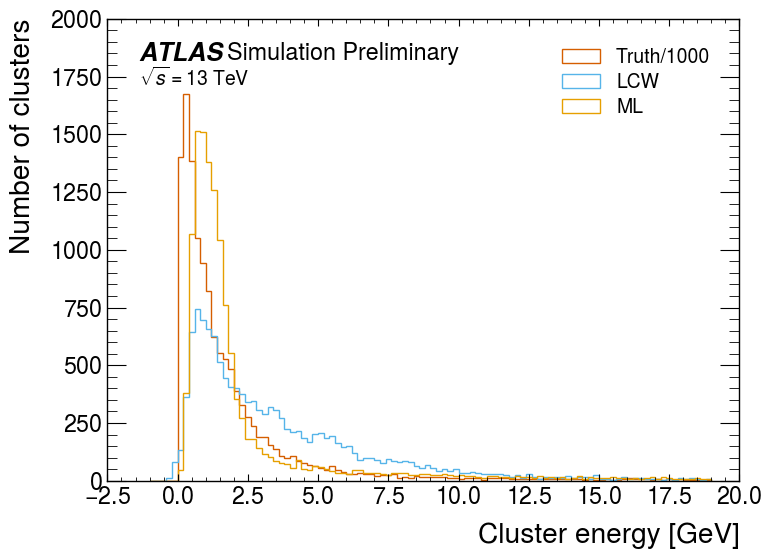

In [28]:
fig, ax = plt.subplots()
ax.hist(df['clusterE_Truth']/1000, range=(-1,19), bins=100, histtype='step', label='Truth/1000')
ax.hist(df['clusterE_LCW'], range=(-1,19), bins=100, histtype='step', label='LCW')
ax.hist(df['clusterE_ML'], range=(-1,19), bins=100, histtype='step', label='ML')
ax.legend()
ax.set_ylim(0, 2000)
ax.set_xlabel('Cluster energy [GeV]')
ax.set_ylabel('Number of clusters')
mplhep.atlas.label('Preliminary', data=False, ax=ax)